In [4]:
import cv2 as cv
from matplotlib.pyplot import imshow, show, figure
import imutils
import numpy as np

def cv2_imshow(image, figsize=(9,9)):
    fig = figure(figsize=figsize)
    try:
        imshow(image[:,:,::-1])
    except IndexError:
        imshow(image, cmap="gray")
    show()

In [13]:

def extract_corners(filename):
    kernel = np.ones((3,3),np.uint8)
    #Read original image and grayscale
    img_original = cv.imread(filename)
    img = cv.cvtColor(cv.imread(filename), cv.COLOR_BGR2GRAY)
    img_copy = img.copy()
    cv2_imshow(img_original)
    #Transform in black and white
    imgt = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,57,3)
    cv2_imshow(imgt)
    imgt_copy = imgt.copy()
    #Find countours
    cnts = cv.findContours(imgt, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)[0]
    #Remove everything inside cells and dilate lines
    for c in cnts:
        area = cv.contourArea(c)
        if area < 1000:
            cv.drawContours(imgt, [c], -1, (0,0,0), -1)
    dilation = cv.dilate(imgt,kernel,iterations = 1)
    inverted = cv.bitwise_not(dilation)
    #Find external countour, create mask and draw external countour on mask
    contours, hierarchy = cv.findContours(image=imgt_copy, mode=cv.RETR_EXTERNAL, method=cv.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(imgt)
    max_c = 0
    max_area = 0
    for contorno in contours:
        c_area = cv.contourArea(contorno)
    if c_area > max_area:
        max_area = c_area
        max_c = contorno
    cv.drawContours(image=mask, contours=[max_c], contourIdx=-1, color=(255), thickness=2, lineType=cv.LINE_AA)
    #Find grid corners and draw on original image
    cv2_imshow(mask)
    corners = cv.goodFeaturesToTrack(mask, 4, 0.5, 50)
    for corner in corners:
        x,y = corner.ravel().astype(int)
        cv.circle(img_original, (x,y), 5, (36,255,12), -1)
    corners = sorted(corners.copy().astype(np.float32).reshape(corners.shape[0], corners.shape[2]), key=lambda x: x[0])
    pts1 = []
    print(corners)
    a,b,c,d = corners
    if a[1]>b[1]:
        pts1.append(list(a))
        pts1.append(list(b))
    else:
        pts1.append(list(b))
        pts1.append(list(a))

    if c[1]>d[1]:
        pts1.append(list(c))
        pts1.append(list(d))
    else:
        pts1.append(list(d))
        pts1.append(list(c))

    # pts1 = Bot-Left; Top-Left; Bot-Right; Top-Right
    pts1 = np.array(pts1)
    return pts1
# cv2_imshow(img_original)
# cv2_imshow(mask)
# cv2_imshow(inverted)

In [16]:
cv.__version__

'4.5.3'

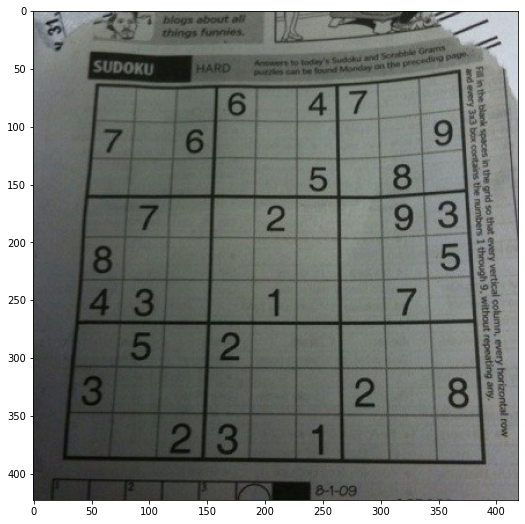

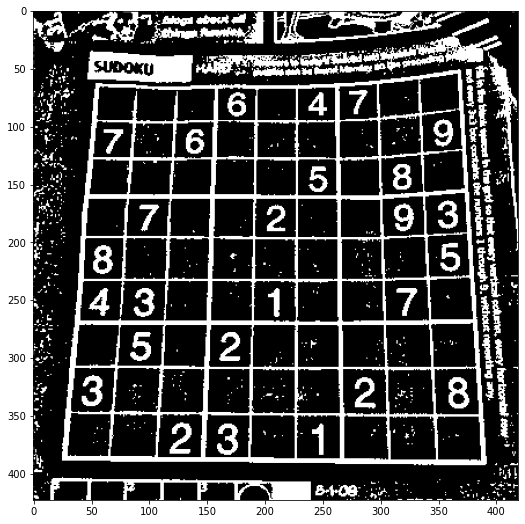

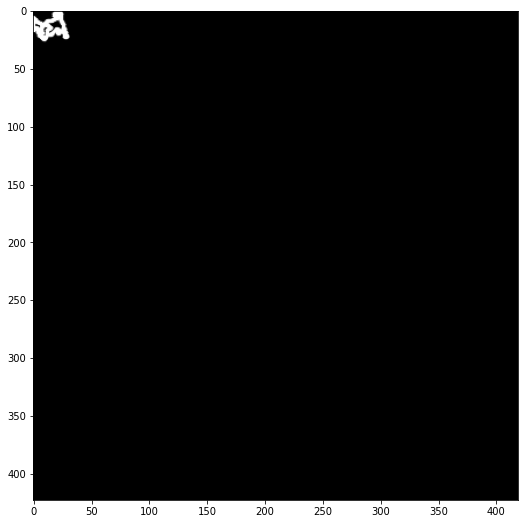

[array([24., 22.], dtype=float32)]


ValueError: not enough values to unpack (expected 4, got 1)

In [15]:
extract_corners("sudoku2.jpeg")

In [ ]:
_,mtx,dist,_,_ = cv.calibrateCamera(objpoints, imgpoints, img.shape[::-1],None,None)
dist

In [ ]:
img_clean = cv.imread('images.jfif')

# Coordinates that you want to Perspective Transform
# Size of the Transformed Image
# pts2 = np.float32([[x_distance,0],[x_distance,y_distance],[0,y_distance],[0,0]])
# pts2 = np.float32([[0,y_distance], [0,0], [x_distance,y_distance], [x_distance,0]])
imsize = 150
pts2 = np.float32([[0,imsize], [0,0], [imsize,imsize], [imsize,0]])
for val in pts1:
    cv.circle(img_clean,(int(val[0]),int(val[1])),1,(0,255,0),-1)
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img_clean,M,(imsize,imsize))
# final = cv.rotate(dst, cv.cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2_imshow(img_original)
cv2_imshow(dst)

In [ ]:

imgt = cv.adaptiveThreshold(cv.cvtColor(dst, cv.COLOR_BGR2GRAY),255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV,31,30)
d = cv.dilate(imgt, (3,3))
p = cv.erode(d, (3,3))
# p = cv.morphologyEx(imgt, cv.MORPH_CLOSE, (5,5))
cv2_imshow(p)